# A Comparative Study of Predictive Machine Learning Algorithms for COVID-19 Trends and Analysis

# Contents
                      
 1. [Preparing DataSets](#1.-Preparing-DataSets)
 
     1.1 [Importing DataSet](#Importing-DataSet)
     
     1.2 [India Dataset](#INDIA)
     
     1.3 [Canada Dataset](#CANADA)
     
     1.4 [China DataSet](#CHINA)
     
 2. [Summarization](#2.-Summarization)
 
 3. [Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
 
 4. [Predicting Methods](#4.-Predicting-Methods)
 
     4.1 [Decision Tree](#Decision-Tree)
     
     4.2 [Linear Regression](#Linear-Regression)
     
     4.3 [Polynomial Regression](#Polynomial-Regression)
     
     4.4 [CNN](#CNN)
     
     4.5 [LSTM](#LSTM)

5. [Results & Evaluation](#5.Results-&-Evaluation)

# 1. Preparing DataSets

**Importing Libraries**

In [747]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

### Importing DataSet

In [748]:
df="WHO-COVID-19-global-data.csv"
df_data=pd.read_csv(df)
df_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
260695,2023-01-02,ZW,Zimbabwe,AFRO,0,259947,0,5635
260696,2023-01-03,ZW,Zimbabwe,AFRO,0,259947,0,5635
260697,2023-01-04,ZW,Zimbabwe,AFRO,0,259947,0,5635
260698,2023-01-05,ZW,Zimbabwe,AFRO,0,259947,0,5635


In [749]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260700 entries, 0 to 260699
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      260700 non-null  object
 1   Country_code       259600 non-null  object
 2   Country            260700 non-null  object
 3   WHO_region         260700 non-null  object
 4   New_cases          260700 non-null  int64 
 5   Cumulative_cases   260700 non-null  int64 
 6   New_deaths         260700 non-null  int64 
 7   Cumulative_deaths  260700 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 15.9+ MB


## INDIA

In [750]:
df_india=df_data.loc[df_data["Country"]=="India"]
df_india

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
105600,2020-01-03,IN,India,SEARO,0,0,0,0
105601,2020-01-04,IN,India,SEARO,0,0,0,0
105602,2020-01-05,IN,India,SEARO,0,0,0,0
105603,2020-01-06,IN,India,SEARO,0,0,0,0
105604,2020-01-07,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...,...
106695,2023-01-02,IN,India,SEARO,173,44678822,2,530707
106696,2023-01-03,IN,India,SEARO,134,44678956,0,530707
106697,2023-01-04,IN,India,SEARO,175,44679131,0,530707
106698,2023-01-05,IN,India,SEARO,188,44679319,3,530710


In [751]:
df_india_filter=df_india[20:111]
df_india_filter

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
105620,2020-01-23,IN,India,SEARO,0,0,0,0
105621,2020-01-24,IN,India,SEARO,0,0,0,0
105622,2020-01-25,IN,India,SEARO,0,0,0,0
105623,2020-01-26,IN,India,SEARO,0,0,0,0
105624,2020-01-27,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...,...
105706,2020-04-18,IN,India,SEARO,991,14378,43,480
105707,2020-04-19,IN,India,SEARO,1334,15712,27,507
105708,2020-04-20,IN,India,SEARO,1553,17265,36,543
105709,2020-04-21,IN,India,SEARO,1336,18601,47,590


In [752]:
data_india=df_india_filter.drop(["Country_code"], axis=1)
data_india

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
105620,2020-01-23,India,SEARO,0,0,0,0
105621,2020-01-24,India,SEARO,0,0,0,0
105622,2020-01-25,India,SEARO,0,0,0,0
105623,2020-01-26,India,SEARO,0,0,0,0
105624,2020-01-27,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...
105706,2020-04-18,India,SEARO,991,14378,43,480
105707,2020-04-19,India,SEARO,1334,15712,27,507
105708,2020-04-20,India,SEARO,1553,17265,36,543
105709,2020-04-21,India,SEARO,1336,18601,47,590


In [753]:
columns=['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']
data_india=df_india_filter.drop(["WHO_region"], axis=1)
data_india

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
105620,2020-01-23,IN,India,0,0,0,0
105621,2020-01-24,IN,India,0,0,0,0
105622,2020-01-25,IN,India,0,0,0,0
105623,2020-01-26,IN,India,0,0,0,0
105624,2020-01-27,IN,India,0,0,0,0
...,...,...,...,...,...,...,...
105706,2020-04-18,IN,India,991,14378,43,480
105707,2020-04-19,IN,India,1334,15712,27,507
105708,2020-04-20,IN,India,1553,17265,36,543
105709,2020-04-21,IN,India,1336,18601,47,590


In [754]:
import matplotlib.pyplot as plt

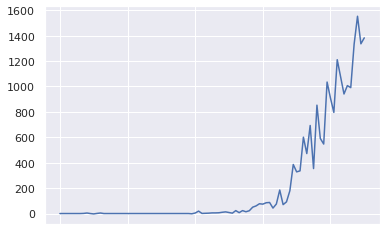

In [755]:
#plt.plot(data_india["Date_reported"],data_india["New_cases"])
plt.plot(data_india["New_cases"])
#plt.plot(data_india["Cumulative_cases"])
plt.tick_params(bottom=False,labelbottom=False)

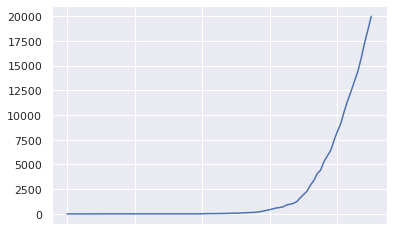

In [756]:
plt.plot(data_india["Cumulative_cases"])
plt.tick_params(bottom=False,labelbottom=False)

## CANADA


In [757]:
df_canada=df_data.loc[df_data["Country"]=="Canada"]
df_canada_filter=df_canada[20:111]
data_canada=df_canada_filter.drop(["WHO_region"], axis=1)
data_canada

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
40720,2020-01-23,CA,Canada,0,0,0,0
40721,2020-01-24,CA,Canada,0,0,0,0
40722,2020-01-25,CA,Canada,0,0,0,0
40723,2020-01-26,CA,Canada,1,1,0,0
40724,2020-01-27,CA,Canada,0,1,0,0
...,...,...,...,...,...,...,...
40806,2020-04-18,CA,Canada,1717,30081,182,1191
40807,2020-04-19,CA,Canada,1791,31872,115,1306
40808,2020-04-20,CA,Canada,1468,33340,158,1464
40809,2020-04-21,CA,Canada,1436,34776,113,1577


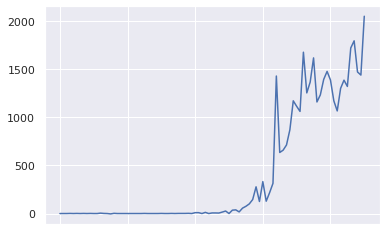

In [758]:
plt.plot(data_canada["New_cases"])
plt.tick_params(bottom=False,labelbottom=False)

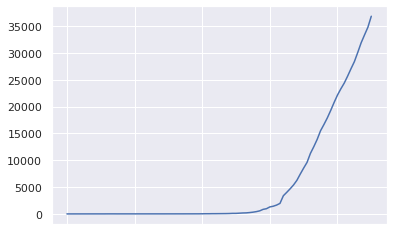

In [759]:
plt.plot(data_canada["Cumulative_cases"])
plt.tick_params(bottom=False,labelbottom=False)

## CHINA

In [760]:
df_china=df_data.loc[df_data["Country"]=="China"]
df_china_filter=df_china[20:111]
data_china=df_china_filter.drop(["WHO_region"], axis=1)
data_china

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
46220,2020-01-23,CN,China,132,574,1,18
46221,2020-01-24,CN,China,261,835,8,26
46222,2020-01-25,CN,China,462,1297,16,42
46223,2020-01-26,CN,China,688,1985,14,56
46224,2020-01-27,CN,China,776,2761,26,82
...,...,...,...,...,...,...,...
46306,2020-04-18,CN,China,356,84180,1290,4642
46307,2020-04-19,CN,China,21,84201,0,4642
46308,2020-04-20,CN,China,36,84237,0,4642
46309,2020-04-21,CN,China,13,84250,0,4642


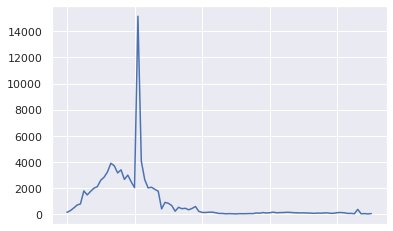

In [761]:
plt.plot(data_china["New_cases"])
plt.tick_params(bottom=False,labelbottom=False)

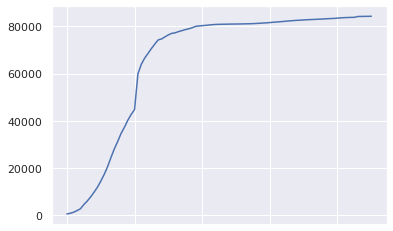

In [762]:
plt.plot(data_china["Cumulative_cases"])
plt.tick_params(bottom=False,labelbottom=False)

In [763]:
data_china.dtypes

Date_reported        object
Country_code         object
Country              object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [764]:
data_china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 46220 to 46310
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      91 non-null     object
 1   Country_code       91 non-null     object
 2   Country            91 non-null     object
 3   New_cases          91 non-null     int64 
 4   Cumulative_cases   91 non-null     int64 
 5   New_deaths         91 non-null     int64 
 6   Cumulative_deaths  91 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.7+ KB


In [765]:
x1=data_china.isnull().values.any()
x2=data_india.isnull().values.any()
x3=data_canada.isnull().values.any()
print(x1,x2,x3)

False False False


# 2. Summarization

In [766]:
data_canada.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,91.0,404.637363,609.667642,-4.0,0.0,6.0,964.0,2046.0
Cumulative_cases,91.0,5559.241758,10040.010140,0.0,8.0,51.0,5820.5,36822.0
New_deaths,91.0,18.538462,38.777802,0.0,0.0,0.0,6.5,182.0
Cumulative_deaths,91.0,162.648352,376.998950,0.0,0.0,0.0,41.5,1687.0


In [767]:
data_china.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,91.0,921.373626,1867.996483,11.0,70.0,128.0,1178.5,15152.0
Cumulative_cases,91.0,65796.318681,27503.178712,574.0,65254.0,80859.0,82496.0,84287.0
New_deaths,91.0,50.824176,140.477882,0.0,4.0,13.0,50.5,1290.0
Cumulative_deaths,91.0,2481.945055,1275.003280,18.0,1592.0,3101.0,3312.0,4642.0


In [768]:
data_india.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,91.0,219.604396,402.698478,-3.0,0.0,5.0,182.5,1553.0
Cumulative_cases,91.0,2265.318681,4699.312016,0.0,7.0,39.0,1161.0,19984.0
New_deaths,91.0,7.032967,13.535509,0.0,0.0,0.0,4.5,50.0
Cumulative_deaths,91.0,70.010989,151.893932,0.0,0.0,0.0,30.5,640.0


# 3. Exploratory Data Analysis (EDA)

In [769]:
for x in columns:
    print("Number of missing values in ", x, data_india[data_india[x] == '?'].shape[0])

Number of missing values in  New_cases 0
Number of missing values in  Cumulative_cases 0
Number of missing values in  New_deaths 0
Number of missing values in  Cumulative_deaths 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02574de160>,
      dtype=object)

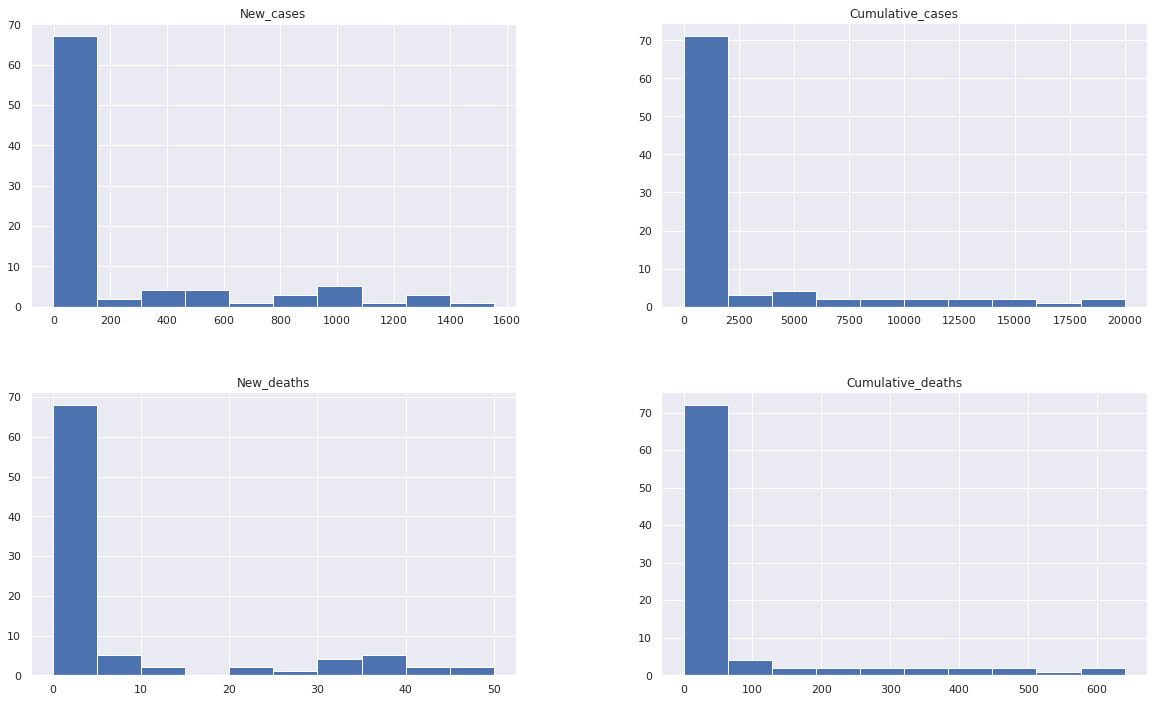

In [770]:
data_india.hist(figsize = (20,12),grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025f09ddc0>,
      dtype=object)

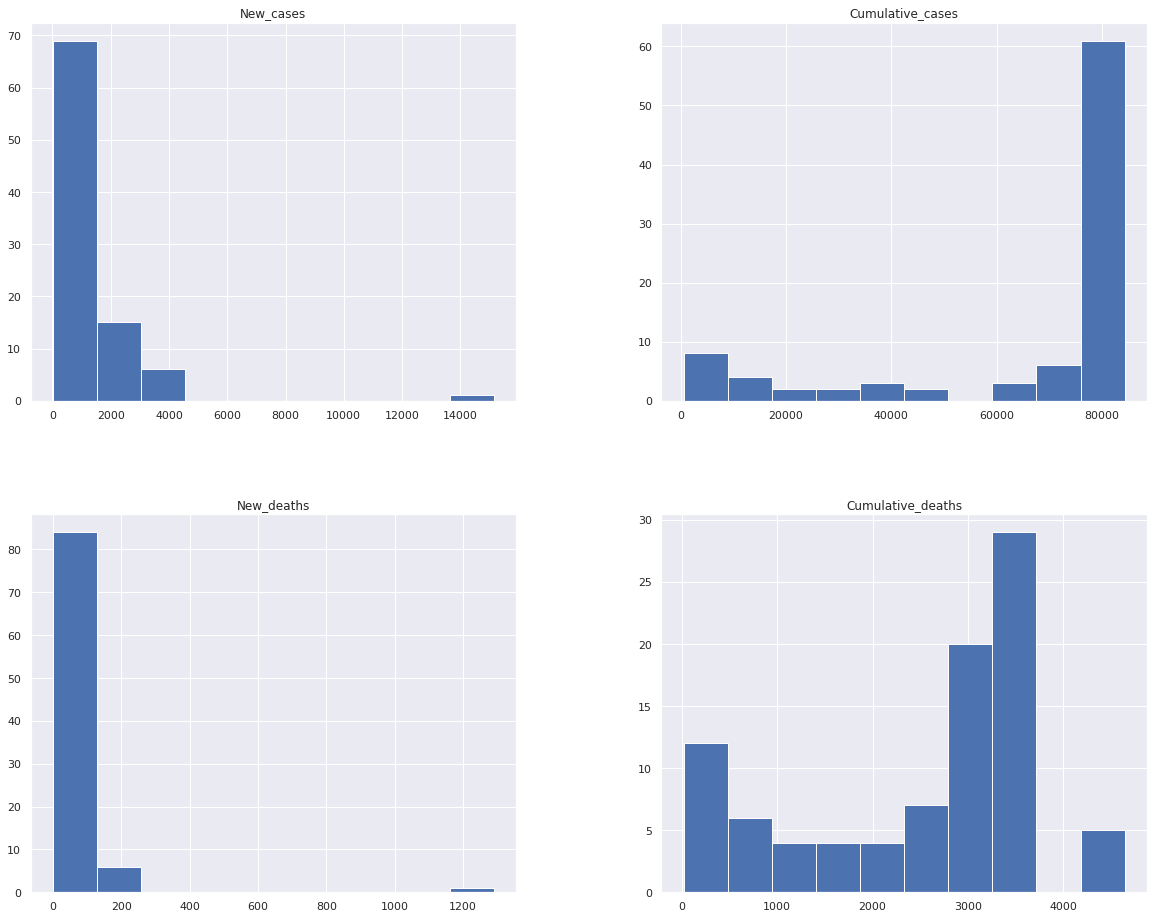

In [771]:
data_china.hist(figsize = (20,16),grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025c924a00>,
      dtype=object)

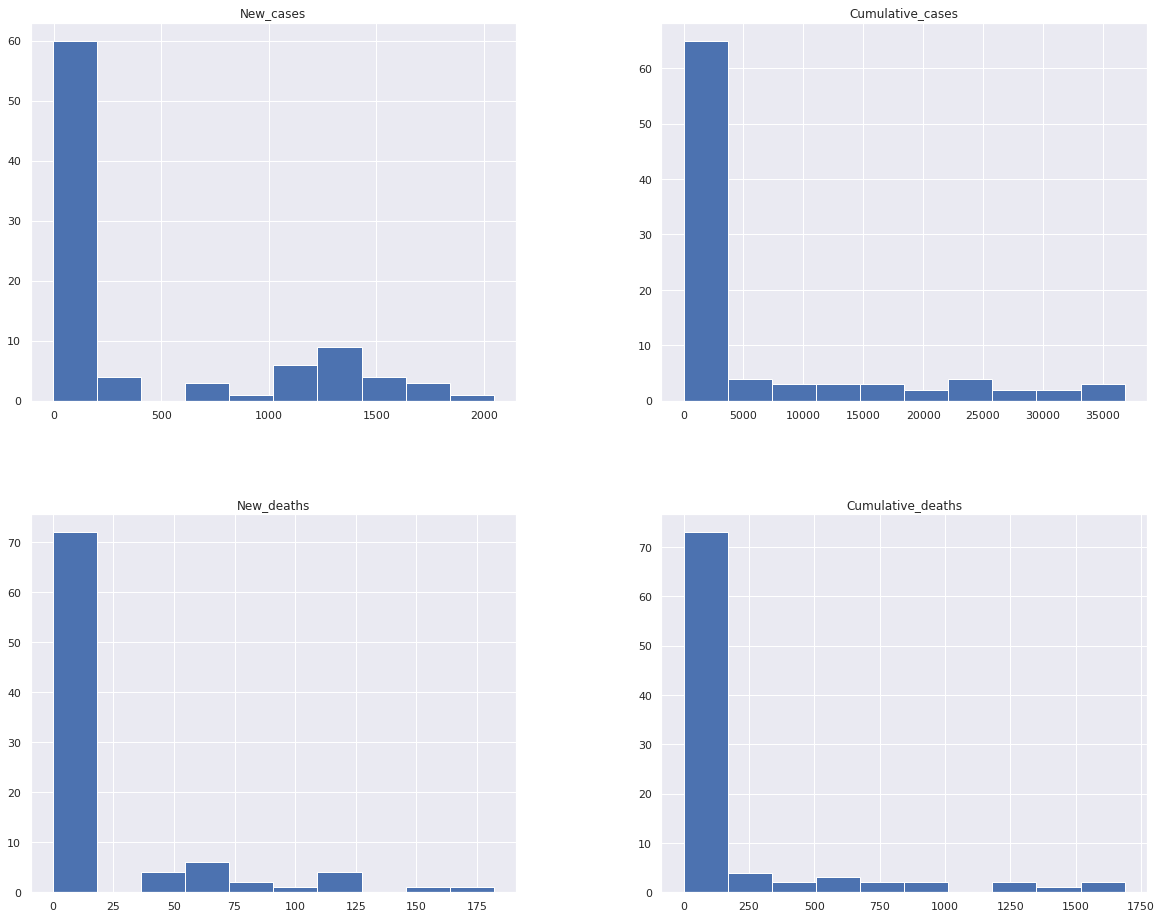

In [772]:
data_canada.hist(figsize = (20,16),grid=True)

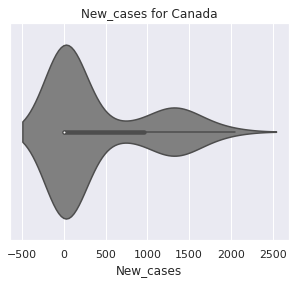

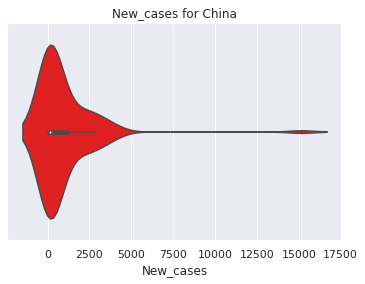

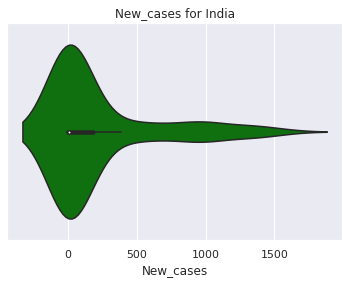

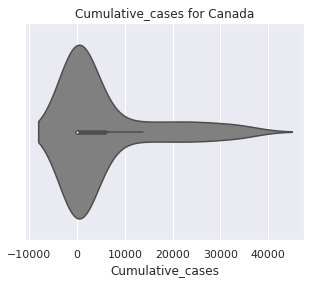

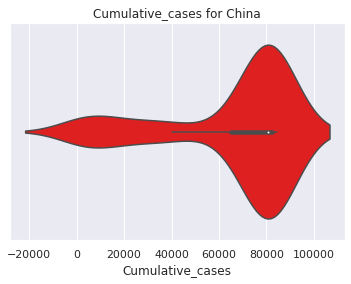

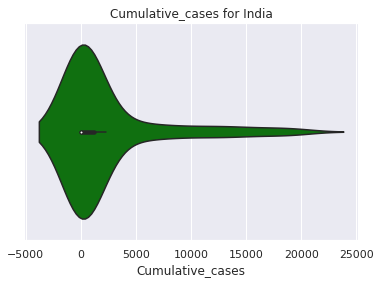

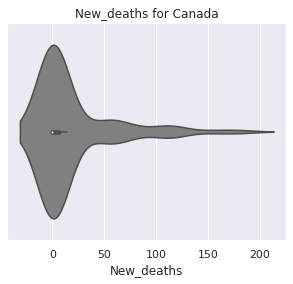

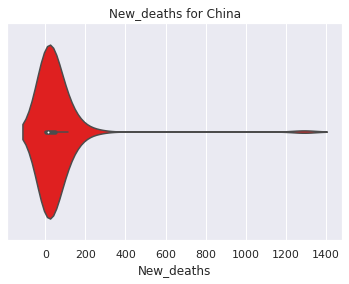

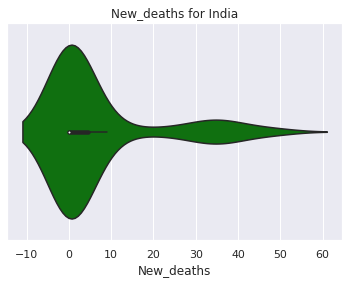

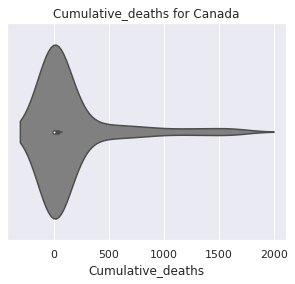

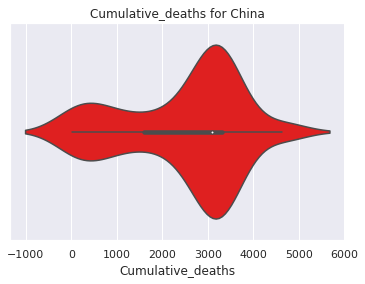

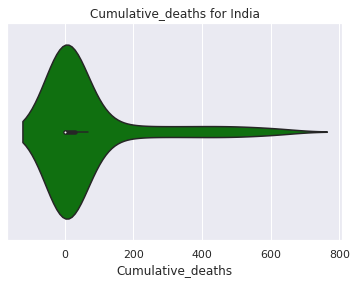

In [773]:
for col in columns:
    plt.figure(figsize = (5,4))
    sns.violinplot(x=data_canada[col],color="gray")
    plt.title(f"{col} for Canada")
    plt.show()
    
    sns.violinplot(x=data_china[col],color="red")
    plt.title(col)
    plt.title(f"{col} for China")
    plt.show()
    
    sns.violinplot(x=data_india[col],color="green")
    plt.title(col)
    plt.title(f"{col} for India")
    plt.show()
    

# 4. Predicting Methods

## Decision Tree Regression

In [774]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Decision trees
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from IPython.display import Image

### Splitting Data

In [775]:
X_train=np.linspace(1,64,num=64).reshape(-1,1)
X_test=np.linspace(65,91,num=27).reshape(-1,1)

#Canada
y_train_canada_cc=np.array(data_canada['Cumulative_cases'][:64]).reshape(-1,1)
y_test_canada_cc=np.array(data_canada['Cumulative_cases'][64:]).reshape(-1,1)

y_train_canada_cd=np.array(data_canada['Cumulative_deaths'][:64]).reshape(-1,1)
y_test_canada_cd=np.array(data_canada['Cumulative_deaths'][64:]).reshape(-1,1)

#China
y_train_china_cc=np.array(data_china['Cumulative_cases'][:64]).reshape(-1,1)
y_test_china_cc=np.array(data_china['Cumulative_cases'][64:]).reshape(-1,1)

y_train_china_cd=np.array(data_china['Cumulative_deaths'][:64]).reshape(-1,1)
y_test_china_cd=np.array(data_china['Cumulative_deaths'][64:]).reshape(-1,1)

#India
y_train_india_cc=np.array(data_india['Cumulative_cases'][:64]).reshape(-1,1)
y_test_india_cc=np.array(data_india['Cumulative_cases'][64:]).reshape(-1,1)

y_train_india_cd=np.array(data_india['Cumulative_deaths'][:64]).reshape(-1,1)
y_test_india_cd=np.array(data_india['Cumulative_deaths'][64:]).reshape(-1,1)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Decision Tree Regression - Canada**

For Cumulative Cases:

In [776]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train_canada_cc)

DecisionTreeRegressor()

In [777]:
train_pred_canada_cc = regressor.predict(X_train)

In [778]:
y_pred_canada_cc=regressor.predict(X_test)

In [779]:
print(y_pred_canada_cc)

[1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959.
 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959. 1959.
 1959. 1959. 1959.]


For Cumulative Deaths:

In [780]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train_canada_cd)
train_pred_canada_cd = regressor.predict(X_train)
y_pred_canada_cd=regressor.predict(X_test)
print(y_pred_canada_cd)

[19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.
 19. 19. 19. 19. 19. 19. 19. 19. 19.]


**Decision Tree Regression - China**

For Cumulative Cases:

In [781]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train_china_cc)
train_pred_china_cc = regressor.predict(X_train)
y_pred_china_cc = regressor.predict(X_test)
print(y_pred_china_cc)

[81961. 81961. 81961. 81961. 81961. 81961. 81961. 81961. 81961. 81961.
 81961. 81961. 81961. 81961. 81961. 81961. 81961. 81961. 81961. 81961.
 81961. 81961. 81961. 81961. 81961. 81961. 81961.]


For Cumulative Deaths:

In [782]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train_china_cd)
train_pred_china_cd = regressor.predict(X_train)
y_pred_china_cd = regressor.predict(X_test)
print(y_pred_china_cd)

[3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293.
 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293. 3293.
 3293. 3293. 3293.]


**Decision Tree Regression - India**

For Cumulative Cases:

In [783]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train_india_cc)
train_pred_india_cc = regressor.predict(X_train)
y_pred_india_cc = regressor.predict(X_test)
print(y_pred_india_cc)

[649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649.
 649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649. 649.]


For Cumulative Deaths:

In [784]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train_india_cd)
train_pred_india_cd = regressor.predict(X_train)
y_pred_india_cd = regressor.predict(X_test)
print(y_pred_india_cd)

[13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13.]


## Linear Regression

In [785]:
from sklearn.linear_model import LinearRegression

**Linear Regression - Canada**

For Cumulative Cases:

In [786]:
lreg_canada_cc = LinearRegression().fit(X_train,y_train_canada_cc)

In [787]:
y_pred_lreg_canada_cc = lreg_canada_cc.predict(X_test)

In [788]:
print(y_pred_lreg_canada_cc)

[[615.3764881 ]
 [628.95970696]
 [642.54292582]
 [656.12614469]
 [669.70936355]
 [683.29258242]
 [696.87580128]
 [710.45902015]
 [724.04223901]
 [737.62545788]
 [751.20867674]
 [764.7918956 ]
 [778.37511447]
 [791.95833333]
 [805.5415522 ]
 [819.12477106]
 [832.70798993]
 [846.29120879]
 [859.87442766]
 [873.45764652]
 [887.04086538]
 [900.62408425]
 [914.20730311]
 [927.79052198]
 [941.37374084]
 [954.95695971]
 [968.54017857]]


In [789]:
print(y_test_canada_cc)

[[ 3385]
 [ 4018]
 [ 4675]
 [ 5386]
 [ 6255]
 [ 7424]
 [ 8536]
 [ 9595]
 [11268]
 [12519]
 [13882]
 [15496]
 [16653]
 [17883]
 [19274]
 [20748]
 [22133]
 [23301]
 [24365]
 [25663]
 [27046]
 [28364]
 [30081]
 [31872]
 [33340]
 [34776]
 [36822]]


For Cumulative Deaths:

In [790]:
lreg_canada_cd = LinearRegression().fit(X_train,y_train_canada_cd)
y_pred_lreg_canada_cd = lreg_canada_cd.predict(X_test)
print(y_pred_lreg_canada_cd)

[[ 6.56845238]
 [ 6.71527015]
 [ 6.86208791]
 [ 7.00890568]
 [ 7.15572344]
 [ 7.30254121]
 [ 7.44935897]
 [ 7.59617674]
 [ 7.74299451]
 [ 7.88981227]
 [ 8.03663004]
 [ 8.1834478 ]
 [ 8.33026557]
 [ 8.47708333]
 [ 8.6239011 ]
 [ 8.77071886]
 [ 8.91753663]
 [ 9.0643544 ]
 [ 9.21117216]
 [ 9.35798993]
 [ 9.50480769]
 [ 9.65162546]
 [ 9.79844322]
 [ 9.94526099]
 [10.09207875]
 [10.23889652]
 [10.38571429]]


**Linear Regression - China**

For Cumulative Cases:

In [791]:
lreg_china_cc = LinearRegression().fit(X_train,y_train_china_cc)
y_pred_lreg_china_cc = lreg_china_cc.predict(X_test)
print(y_pred_lreg_china_cc)

[[104654.75      ]
 [106077.09519231]
 [107499.44038462]
 [108921.78557692]
 [110344.13076923]
 [111766.47596154]
 [113188.82115385]
 [114611.16634615]
 [116033.51153846]
 [117455.85673077]
 [118878.20192308]
 [120300.54711538]
 [121722.89230769]
 [123145.2375    ]
 [124567.58269231]
 [125989.92788462]
 [127412.27307692]
 [128834.61826923]
 [130256.96346154]
 [131679.30865385]
 [133101.65384615]
 [134523.99903846]
 [135946.34423077]
 [137368.68942308]
 [138791.03461538]
 [140213.37980769]
 [141635.725     ]]


For Cumulative Deaths:

In [792]:
lreg_china_cd = LinearRegression().fit(X_train,y_train_china_cd)
y_pred_lreg_china_cd = lreg_china_cd.predict(X_test)
print(y_pred_lreg_china_cd)

[[4058.21279762]
 [4120.91790293]
 [4183.62300824]
 [4246.32811355]
 [4309.03321886]
 [4371.73832418]
 [4434.44342949]
 [4497.1485348 ]
 [4559.85364011]
 [4622.55874542]
 [4685.26385073]
 [4747.96895604]
 [4810.67406136]
 [4873.37916667]
 [4936.08427198]
 [4998.78937729]
 [5061.4944826 ]
 [5124.19958791]
 [5186.90469322]
 [5249.60979853]
 [5312.31490385]
 [5375.02000916]
 [5437.72511447]
 [5500.43021978]
 [5563.13532509]
 [5625.8404304 ]
 [5688.54553571]]


**Linear Regression - India**

For Cumulative Cases:

In [793]:
lreg_india_cc = LinearRegression().fit(X_train,y_train_india_cc)
y_pred_lreg_india_cc = lreg_india_cc.predict(X_test)
print(y_pred_lreg_india_cc)

[[238.05357143]
 [243.20137363]
 [248.34917582]
 [253.49697802]
 [258.64478022]
 [263.79258242]
 [268.94038462]
 [274.08818681]
 [279.23598901]
 [284.38379121]
 [289.53159341]
 [294.6793956 ]
 [299.8271978 ]
 [304.975     ]
 [310.1228022 ]
 [315.2706044 ]
 [320.41840659]
 [325.56620879]
 [330.71401099]
 [335.86181319]
 [341.00961538]
 [346.15741758]
 [351.30521978]
 [356.45302198]
 [361.60082418]
 [366.74862637]
 [371.89642857]]


For Cumulative Deaths:

In [794]:
lreg_india_cd = LinearRegression().fit(X_train,y_train_india_cd)
y_pred_lreg_india_cd = lreg_india_cd.predict(X_test)
print(y_pred_lreg_india_cd)

[[4.13839286]
 [4.23063187]
 [4.32287088]
 [4.41510989]
 [4.5073489 ]
 [4.59958791]
 [4.69182692]
 [4.78406593]
 [4.87630495]
 [4.96854396]
 [5.06078297]
 [5.15302198]
 [5.24526099]
 [5.3375    ]
 [5.42973901]
 [5.52197802]
 [5.61421703]
 [5.70645604]
 [5.79869505]
 [5.89093407]
 [5.98317308]
 [6.07541209]
 [6.1676511 ]
 [6.25989011]
 [6.35212912]
 [6.44436813]
 [6.53660714]]


## Polynomial Regression

In [795]:
from sklearn.preprocessing import PolynomialFeatures

**Poly Regression - Canada**

For Cumulative Cases:

In [796]:
poly_reg_canada_cc = PolynomialFeatures(degree=6)
X_train_poly = poly_reg_canada_cc.fit_transform(X_train)

In [797]:
poly_reg_canada_cc.fit(X_train_poly, y_train_canada_cc)

PolynomialFeatures(degree=6)

In [798]:
lreg2_canada_cc = LinearRegression()
lreg2_canada_cc.fit(X_train_poly, y_train_canada_cc)

LinearRegression()

For Cumulative Deaths:

In [799]:
poly_reg_canada_cd = PolynomialFeatures(degree=5)
X_train_poly = poly_reg_canada_cd.fit_transform(X_train)

In [800]:
poly_reg_canada_cd.fit(X_train_poly, y_train_canada_cd)
lreg2_canada_cd = LinearRegression()
lreg2_canada_cd.fit(X_train_poly, y_train_canada_cd)

LinearRegression()

**Polynomial Regression - China**

For Cumulative Cases:

In [801]:
poly_reg_china_cc = PolynomialFeatures(degree=4)
X_train_poly = poly_reg_china_cc.fit_transform(X_train)

In [802]:
poly_reg_china_cc.fit(X_train_poly, y_train_china_cc)
lreg2_china_cc = LinearRegression()
lreg2_china_cc.fit(X_train_poly, y_train_china_cc)

LinearRegression()

For Cumulative Deaths:

In [803]:
poly_reg_china_cd = PolynomialFeatures(degree=2)
X_train_poly = poly_reg_china_cd.fit_transform(X_train)

In [804]:
poly_reg_china_cd.fit(X_train_poly, y_train_china_cd)
lreg2_china_cd = LinearRegression()
lreg2_china_cd.fit(X_train_poly, y_train_china_cd)

LinearRegression()

**Polynomial Regression - India**

For Cumulative Cases:

In [805]:
poly_reg_india_cc = PolynomialFeatures(degree=6)
X_train_poly = poly_reg_india_cc.fit_transform(X_train)

In [806]:
poly_reg_india_cc.fit(X_train_poly, y_train_india_cc)
lreg2_india_cc = LinearRegression()
lreg2_india_cc.fit(X_train_poly, y_train_india_cc)

LinearRegression()

For Cumulative Deaths:

In [807]:
poly_reg_india_cd = PolynomialFeatures(degree=8)
X_train_poly = poly_reg_india_cd.fit_transform(X_train)

In [808]:
poly_reg_india_cd.fit(X_train_poly, y_train_india_cd)
lreg2_india_cd = LinearRegression()
lreg2_india_cd.fit(X_train_poly, y_train_india_cd)

LinearRegression()

### Comparison

**For Train data:**

**Canada**

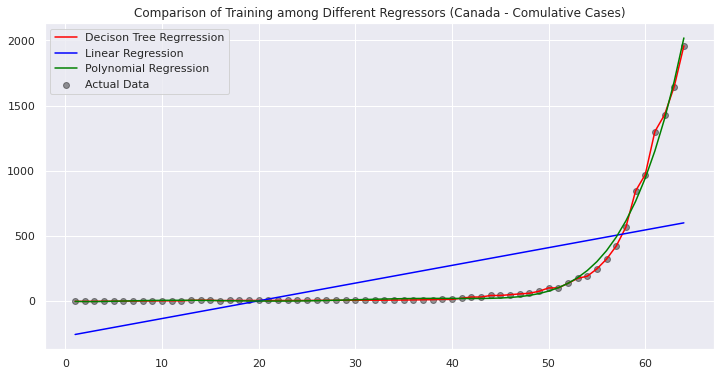

In [809]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train_canada_cc, color="black",alpha= 0.4, label="Actual Data")
plt.plot(X_train,train_pred_canada_cc,color="red", label="Decison Tree Regrression")
plt.plot(X_train,lreg_canada_cc.predict(X_train), color="blue", label="Linear Regression")
plt.plot(X_train,lreg2_canada_cc.predict(poly_reg_canada_cc.fit_transform(X_train)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Training among Different Regressors (Canada - Comulative Cases)")
plt.show()

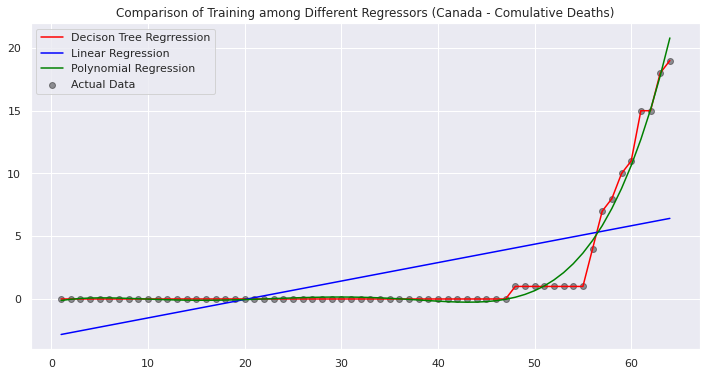

In [810]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train_canada_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_train,train_pred_canada_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_train,lreg_canada_cd.predict(X_train), color="blue", label="Linear Regression")
plt.plot(X_train,lreg2_canada_cd.predict(poly_reg_canada_cd.fit_transform(X_train)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Training among Different Regressors (Canada - Comulative Deaths)")
plt.show()

**China**

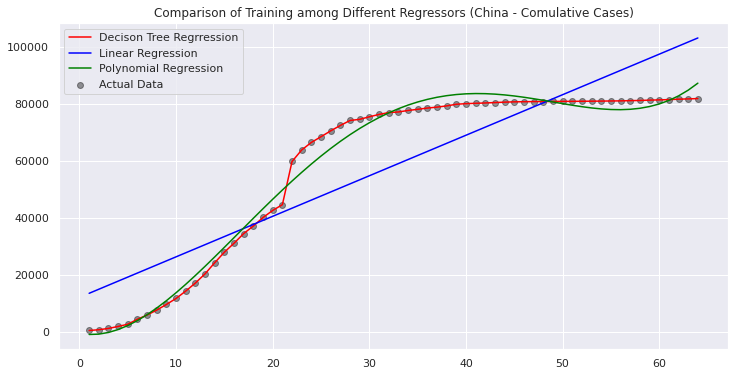

In [811]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train_china_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_train,train_pred_china_cc, color="red", label="Decison Tree Regrression")
plt.plot(X_train,lreg_china_cc.predict(X_train), color="blue", label="Linear Regression")
plt.plot(X_train,lreg2_china_cc.predict(poly_reg_china_cc.fit_transform(X_train)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Training among Different Regressors (China - Comulative Cases)")
plt.show()

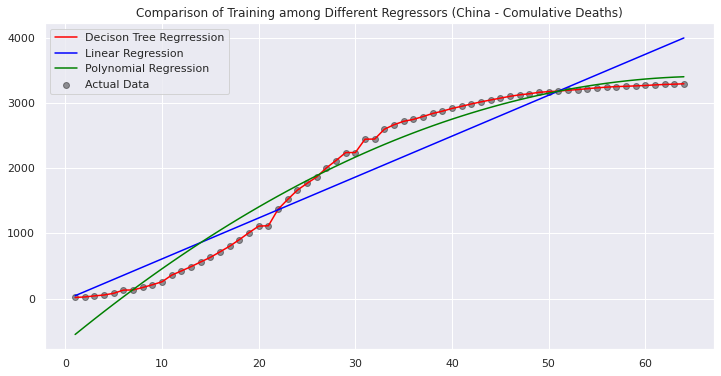

In [812]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train_china_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_train,train_pred_china_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_train,lreg_china_cd.predict(X_train), color="blue", label="Linear Regression")
plt.plot(X_train,lreg2_china_cd.predict(poly_reg_china_cd.fit_transform(X_train)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Training among Different Regressors (China - Comulative Deaths)")
plt.show()

**India**

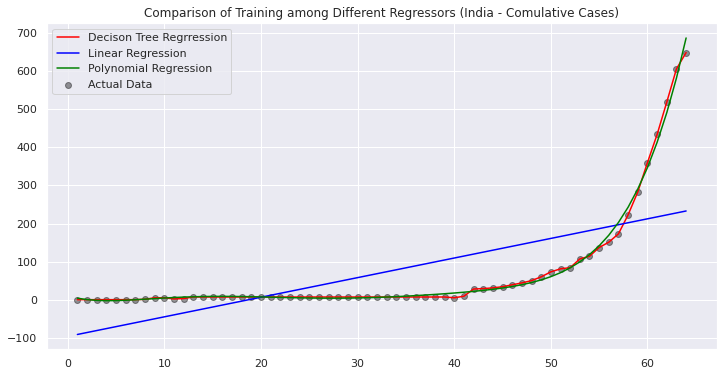

In [813]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train_india_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_train,train_pred_india_cc, color="red", label="Decison Tree Regrression")
plt.plot(X_train,lreg_india_cc.predict(X_train), color="blue", label="Linear Regression")
plt.plot(X_train,lreg2_india_cc.predict(poly_reg_india_cc.fit_transform(X_train)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Training among Different Regressors (India - Comulative Cases)")
plt.show()

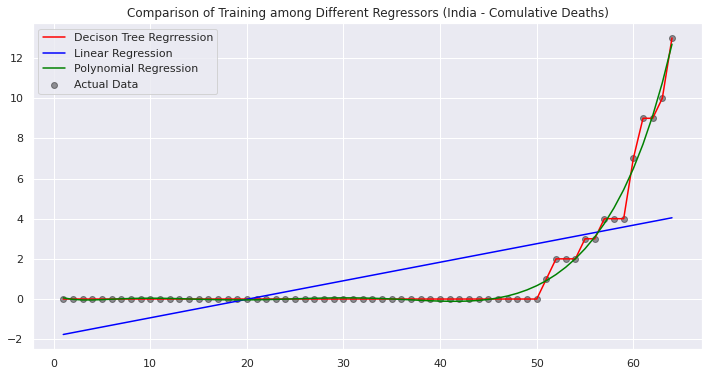

In [814]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train_india_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_train,train_pred_india_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_train,lreg_india_cd.predict(X_train), color="blue", label="Linear Regression")
plt.plot(X_train,lreg2_india_cd.predict(poly_reg_india_cd.fit_transform(X_train)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Training among Different Regressors (India - Comulative Deaths)")
plt.show()

**For Test Data:**

**Canada**

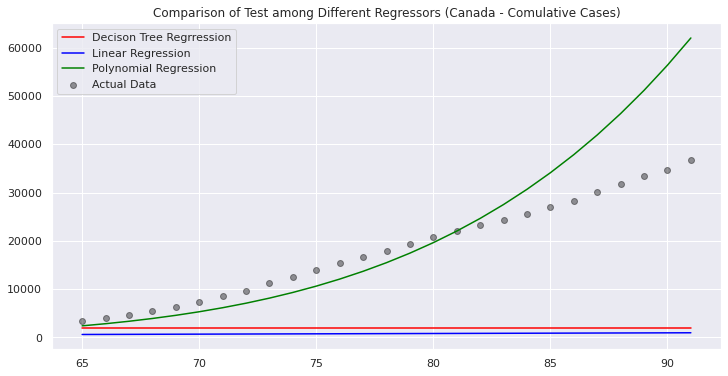

In [815]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_canada_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_test,y_pred_canada_cc, color="red", label="Decison Tree Regrression")
plt.plot(X_test,lreg_canada_cc.predict(X_test), color="blue", label="Linear Regression")
plt.plot(X_test,lreg2_canada_cc.predict(poly_reg_canada_cc.fit_transform(X_test)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Test among Different Regressors (Canada - Comulative Cases)")
plt.show()

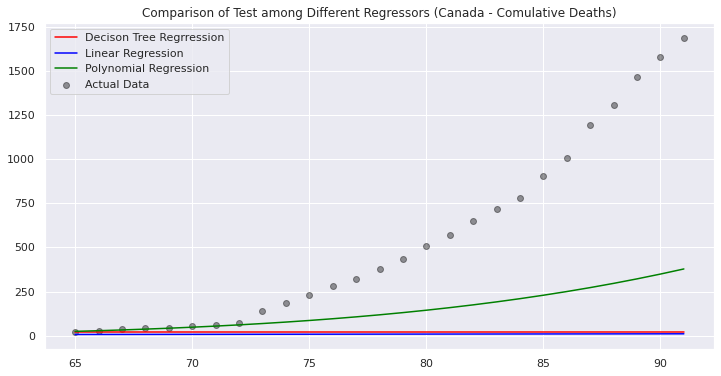

In [816]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_canada_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_test,y_pred_canada_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_test,lreg_canada_cd.predict(X_test), color="blue", label="Linear Regression")
plt.plot(X_test,lreg2_canada_cd.predict(poly_reg_canada_cd.fit_transform(X_test)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Test among Different Regressors (Canada - Comulative Deaths)")
plt.show()

**China**

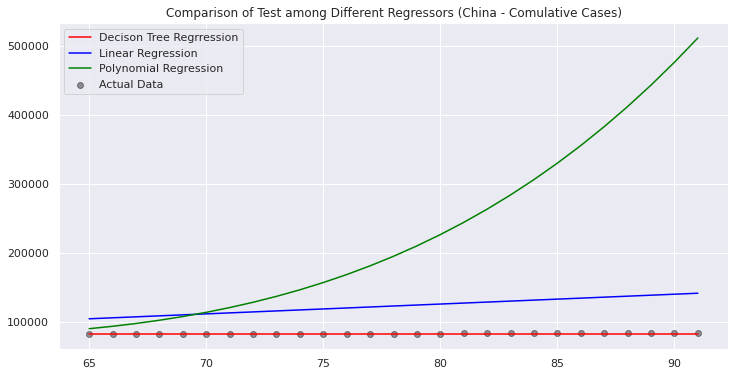

In [817]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_china_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_test,y_pred_china_cc, color="red", label="Decison Tree Regrression")
plt.plot(X_test,lreg_china_cc.predict(X_test), color="blue", label="Linear Regression")
plt.plot(X_test,lreg2_china_cc.predict(poly_reg_china_cc.fit_transform(X_test)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Test among Different Regressors (China - Comulative Cases)")
plt.show()

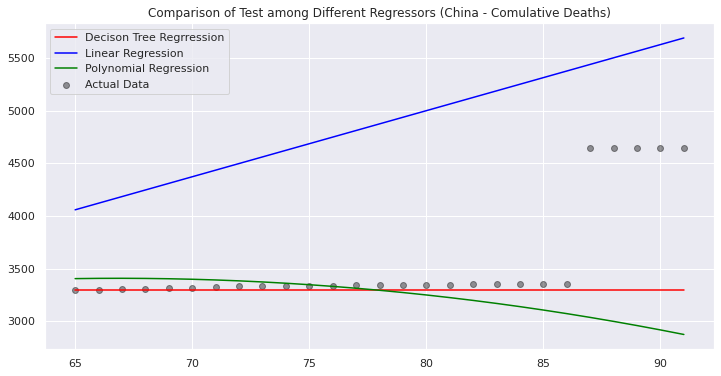

In [818]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_china_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_test,y_pred_china_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_test,lreg_china_cd.predict(X_test), color="blue", label="Linear Regression")
plt.plot(X_test,lreg2_china_cd.predict(poly_reg_china_cd.fit_transform(X_test)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Test among Different Regressors (China - Comulative Deaths)")
plt.show()

**India**

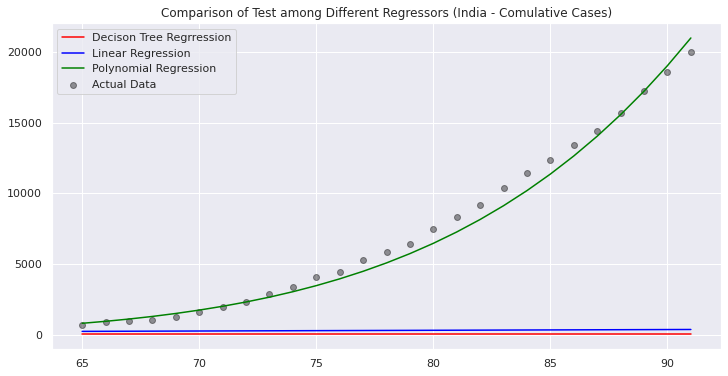

In [819]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_india_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_test,y_pred_canada_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_test,lreg_india_cc.predict(X_test), color="blue", label="Linear Regression")
plt.plot(X_test,lreg2_india_cc.predict(poly_reg_india_cc.fit_transform(X_test)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Test among Different Regressors (India - Comulative Cases)")
plt.show()

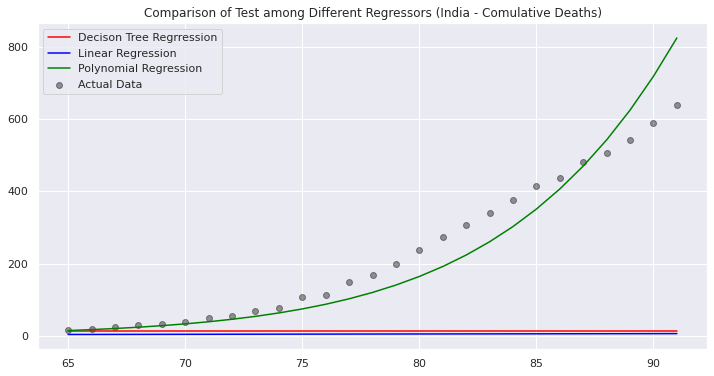

In [820]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_india_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(X_test,y_pred_india_cd, color="red", label="Decison Tree Regrression")
plt.plot(X_test,lreg_india_cd.predict(X_test), color="blue", label="Linear Regression")
plt.plot(X_test,lreg2_india_cd.predict(poly_reg_india_cd.fit_transform(X_test)),color="green", label="Polynomial Regression")
plt.legend()
plt.title("Comparison of Test among Different Regressors (India - Comulative Deaths)")
plt.show()

## CNN

In [821]:
import os
import datetime

import IPython
import IPython.display
import tensorflow as tf

**Canada**

For Comulative Cases:

In [822]:
df_canada_cc_train = pd.DataFrame({"Case" : y_train_canada_cc.reshape(-1)})
df_canada_cc_train

,Case
0,0
1,0
2,0
3,1
4,1
...,...
59,971
60,1302
61,1430
62,1646


In [823]:
nn_X_test = np.linspace(1,91,num=91).reshape(-1,1)

In [824]:
nn_test_canada_cc =np.array(data_canada['Cumulative_cases']).reshape(-1,1)

In [825]:
df_canada_cc_test = pd.DataFrame({"Case" : nn_test_canada_cc.reshape(-1)})
df_canada_cc_test

,Case
0,0
1,0
2,0
3,1
4,1
...,...
86,30081
87,31872
88,33340
89,34776


In [826]:
z=X_train.reshape(-1)
z

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [827]:
column_indices = {name: i for i, name in enumerate(df_canada_cc_train.columns)}
train_df=df_canada_cc_train
val_df=df_canada_cc_train
test_df=df_canada_cc_test

num_features = 1

In [828]:
class WindowGenerator():
      def __init__(self, input_width, label_width, shift,
                   train_df=train_df, val_df=val_df, test_df=test_df,
                   label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
            
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

      def __repr__(self):
          return '\n'.join([
          f'Total window size: {self.total_window_size}',
          f'Input indices: {self.input_indices}',
          f'Label indices: {self.label_indices}',
          f'Label column name(s): {self.label_columns}'])

      def split_window(self, features):
          inputs = features[:, self.input_slice, :]
          labels = features[:, self.labels_slice, :]
          if self.label_columns is not None:
              labels = tf.stack(
              [labels[:, :, self.column_indices[name]] for name in self.label_columns],
              axis=-1)

          # Slicing doesn't preserve static shape information, so set the shapes
          # manually. This way the `tf.data.Datasets` are easier to inspect.
          inputs.set_shape([None, self.input_width, None])
          labels.set_shape([None, self.label_width, None])

          return inputs, labels

      def make_dataset(self, data):
          data = np.array(data, dtype=np.float32)
          ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)
          ds = ds.map(self.split_window)
          return ds


@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test

In [829]:
case_window = WindowGenerator(train_df = df_canada_cc_train,val_df = df_canada_cc_train, test_df = df_canada_cc_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

In [830]:
MAX_EPOCHS = 600

def compile_and_fit(model, window, patience=400):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.keras.metrics.MeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

In [831]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=30,
                           kernel_size=(3,),
                           activation='relu'),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

conv_hist = compile_and_fit(conv_model, case_window)
IPython.display.clear_output()

In [832]:
cnn_pred_canada_cc = conv_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


For Comulative Deaths:

In [833]:
df_canada_cd_train = pd.DataFrame({"Case" : y_train_canada_cd.reshape(-1)})

nn_test_canada_cd =np.array(data_canada['Cumulative_deaths']).reshape(-1,1)

df_canada_cd_test = pd.DataFrame({"Case" : nn_test_canada_cd.reshape(-1)})

column_indices = {name: i for i, name in enumerate(df_canada_cd_train.columns)}
train_df=df_canada_cd_train
val_df=df_canada_cd_train
test_df=df_canada_cd_test

num_features = 1

case_window = WindowGenerator(train_df = df_canada_cc_train,val_df = df_canada_cd_train, test_df = df_canada_cd_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

conv_hist = compile_and_fit(conv_model, case_window)
IPython.display.clear_output()

cnn_pred_canada_cd = conv_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


**China**

For Comulative Cases:

In [834]:
df_china_cc_train = pd.DataFrame({"Case" : y_train_china_cc.reshape(-1)})

nn_test_china_cc = np.array(data_china['Cumulative_cases']).reshape(-1,1)

df_china_cc_test = pd.DataFrame({"Case" : nn_test_china_cc.reshape(-1)})

column_indices = {name: i for i, name in enumerate(df_canada_cc_train.columns)}
train_df=df_china_cc_train
val_df=df_china_cc_train
test_df=df_china_cc_test

num_features = 1

case_window = WindowGenerator(train_df = df_china_cc_train, val_df = df_china_cc_train, test_df = df_china_cc_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

conv_hist = compile_and_fit(conv_model, case_window)
IPython.display.clear_output()

cnn_pred_china_cc = conv_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


For Comulative Deaths:

In [835]:
df_china_cd_train = pd.DataFrame({"Case" : y_train_china_cd.reshape(-1)})

nn_test_china_cd =np.array(data_china['Cumulative_deaths']).reshape(-1,1)

df_china_cd_test = pd.DataFrame({"Case" : nn_test_china_cd.reshape(-1)})

column_indices = {name: i for i, name in enumerate(df_canada_cd_train.columns)}
train_df=df_canada_cc_train
val_df=df_canada_cc_train
test_df=df_canada_cc_test

num_features = 1

case_window = WindowGenerator(train_df = df_canada_cd_train, val_df = df_canada_cd_train, test_df = df_canada_cd_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

conv_hist = compile_and_fit(conv_model, case_window)
IPython.display.clear_output()

cnn_pred_china_cd = conv_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


**India**

For Comulative Cases:

In [836]:
df_india_cc_train = pd.DataFrame({"Case" : y_train_india_cc.reshape(-1)})

nn_test_india_cc =np.array(data_india['Cumulative_cases']).reshape(-1,1)

df_india_cc_test = pd.DataFrame({"Case" : nn_test_india_cc.reshape(-1)})

column_indices = {name: i for i, name in enumerate(df_india_cc_train.columns)}
train_df=df_india_cc_train
val_df=df_india_cc_train
test_df=df_india_cc_test

num_features = 1

case_window = WindowGenerator(train_df = df_india_cc_train, val_df = df_india_cc_train, test_df = df_india_cc_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

conv_hist = compile_and_fit(conv_model, case_window)
IPython.display.clear_output()

cnn_pred_india_cc = conv_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


For Comulative Deaths:

In [837]:
df_india_cd_train = pd.DataFrame({"Case" : y_train_india_cd.reshape(-1)})

nn_test_india_cd =np.array(data_india['Cumulative_deaths']).reshape(-1,1)

df_india_cd_test = pd.DataFrame({"Case" : nn_test_india_cd.reshape(-1)})

column_indices = {name: i for i, name in enumerate(df_india_cd_train.columns)}
train_df=df_india_cd_train
val_df=df_india_cd_train
test_df=df_india_cd_test

num_features = 1

case_window = WindowGenerator(train_df = df_india_cd_train, val_df = df_india_cd_train, test_df = df_india_cd_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

conv_hist = compile_and_fit(conv_model, case_window)
IPython.display.clear_output()

cnn_pred_india_cd = conv_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


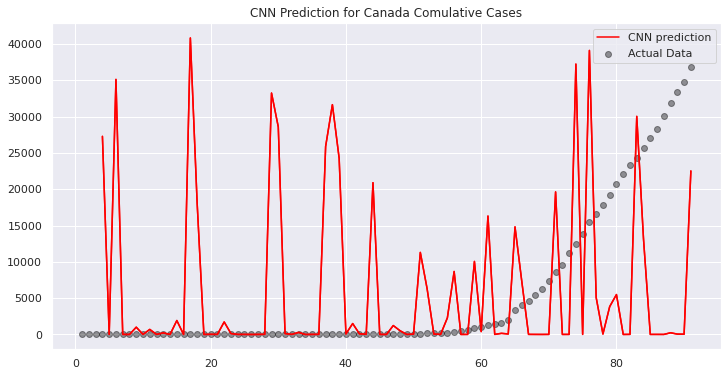

In [838]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_canada_cc, color="black",alpha= 0.4)
plt.scatter(X_train,y_train_canada_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_canada_cc.reshape(-1), color="red")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_canada_cc.reshape(-1), color="red", label="CNN prediction")
plt.legend()
plt.title("CNN Prediction for Canada Comulative Cases")
plt.show()

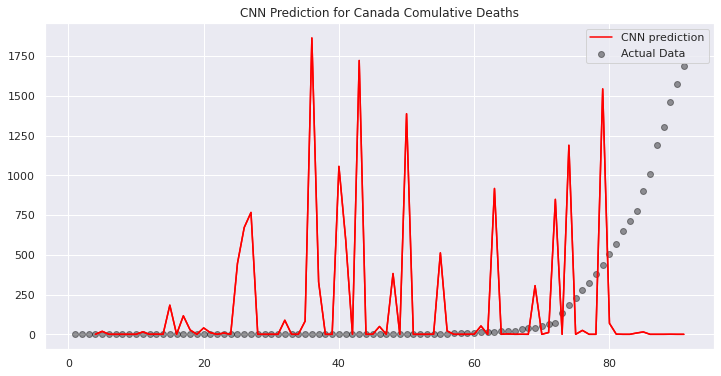

In [839]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_canada_cd, color="black",alpha= 0.4)
plt.scatter(X_train,y_train_canada_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_canada_cd.reshape(-1), color="red")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_canada_cd.reshape(-1), color="red", label="CNN prediction")
plt.legend()
plt.title("CNN Prediction for Canada Comulative Deaths")
plt.show()

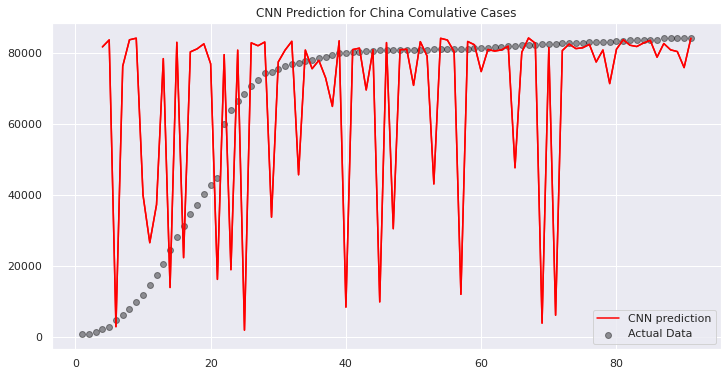

In [840]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_china_cc, color="black",alpha= 0.4)
plt.scatter(X_train,y_train_china_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_china_cc.reshape(-1), color="red")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_china_cc.reshape(-1), color="red", label="CNN prediction")
plt.legend()
plt.title("CNN Prediction for China Comulative Cases")
plt.show()

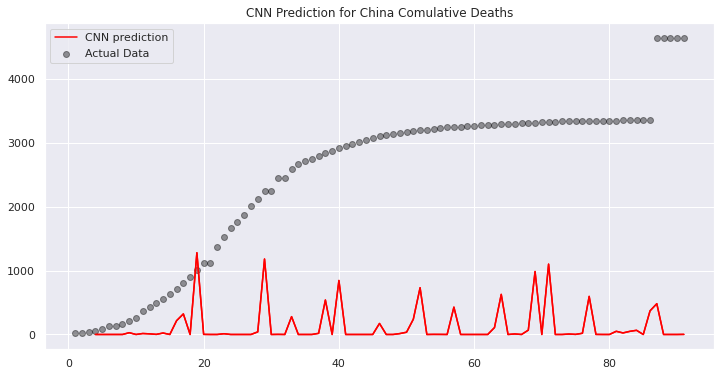

In [841]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_china_cd, color="black",alpha= 0.4)
plt.scatter(X_train,y_train_china_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_china_cd.reshape(-1), color="red")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_china_cd.reshape(-1), color="red", label="CNN prediction")
plt.legend()
plt.title("CNN Prediction for China Comulative Deaths")
plt.show()

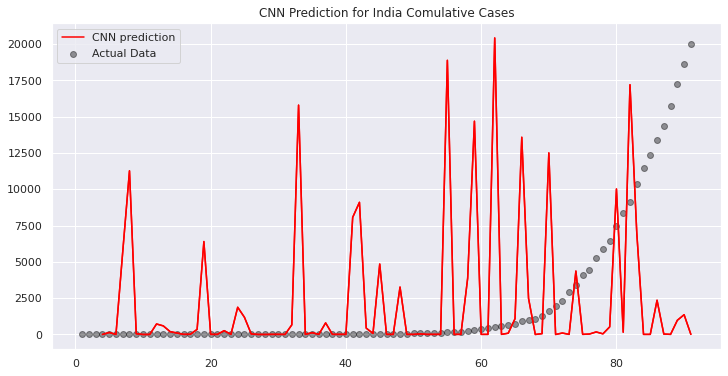

In [842]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_india_cc, color="black",alpha= 0.4)
plt.scatter(X_train,y_train_india_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_india_cc.reshape(-1), color="red")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_india_cc.reshape(-1), color="red", label="CNN prediction")
plt.legend()
plt.title("CNN Prediction for India Comulative Cases")
plt.show()

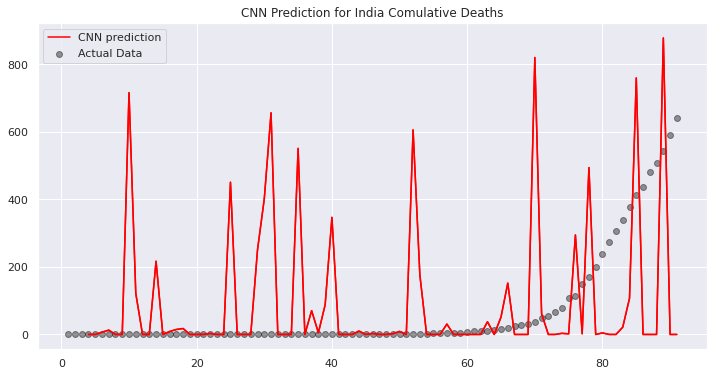

In [843]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_india_cd, color="black",alpha= 0.4)
plt.scatter(X_train,y_train_india_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_india_cd.reshape(-1), color="red")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],cnn_pred_india_cd.reshape(-1), color="red", label="CNN prediction")
plt.legend()
plt.title("CNN Prediction for India Comulative Deaths")
plt.show()

## LSTM

**Canada**

For Comulative Cases:

Simple LSTM

In [844]:
case_window = WindowGenerator(train_df = df_canada_cc_train,val_df = df_canada_cc_train, test_df = df_canada_cc_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

In [845]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(100, return_sequences= False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

lstm_hist = compile_and_fit(lstm_model, case_window)
IPython.display.clear_output()

LSTM auto Encoder

In [846]:
lstm_model2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(100, return_sequences= False),
    tf.keras.layers.RepeatVector(1),
    tf.keras.layers.LSTM(100, return_sequences= True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

lstm_hist_canada_cc = compile_and_fit(lstm_model2, case_window)
IPython.display.clear_output()

But We Use Simple LSTM for our Case

In [847]:
lstm_pred_canada_cc = lstm_model.predict(case_window.test)

3/3 [==============================] - 0s 4ms/step


In [848]:
print(lstm_pred_canada_cc)

[[115.57684   ]
 [  8.071366  ]
 [  8.071366  ]
 [ 12.722478  ]
 [115.57684   ]
 [115.57684   ]
 [115.57684   ]
 [115.57684   ]
 [115.57684   ]
 [  7.7823215 ]
 [  7.2144494 ]
 [115.57684   ]
 [115.57684   ]
 [  7.3488374 ]
 [ 32.183075  ]
 [  8.891193  ]
 [ 10.446199  ]
 [  9.667848  ]
 [  8.9501    ]
 [115.57684   ]
 [  9.206226  ]
 [  7.3488374 ]
 [  8.9501    ]
 [115.57684   ]
 [ -0.20843768]
 [  7.3488374 ]
 [115.57647   ]
 [115.57684   ]
 [ 52.29234   ]
 [  7.3488374 ]
 [ 42.702957  ]
 [  6.9422417 ]
 [115.57684   ]
 [  7.8459435 ]
 [115.57684   ]
 [115.57684   ]
 [115.57684   ]
 [  1.8120441 ]
 [ 55.32459   ]
 [ 62.44725   ]
 [ 14.890744  ]
 [115.57684   ]
 [ 22.26908   ]
 [115.57684   ]
 [115.57684   ]
 [115.57684   ]
 [  5.217931  ]
 [  2.1531692 ]
 [115.46386   ]
 [115.57684   ]
 [  7.3488374 ]
 [115.57504   ]
 [ 17.928217  ]
 [115.57684   ]
 [102.48155   ]
 [  8.649349  ]
 [  7.3488374 ]
 [  5.9922    ]
 [115.57684   ]
 [112.691185  ]
 [  7.9164643 ]
 [ 76.08415   ]
 [115.52

In [849]:
lstm_pred2_canada_cc = lstm_model2.predict(case_window.test)

3/3 [==============================] - 1s 6ms/step


For Comulative Deaths:

In [852]:
case_window = WindowGenerator(train_df = df_canada_cd_train,val_df = df_canada_cd_train, test_df = df_canada_cd_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

lstm_hist_canada_cd = compile_and_fit(lstm_model, case_window)
IPython.display.clear_output()

lstm_pred_canada_cd = lstm_model.predict(case_window.test)

3/3 [==============================] - 1s 5ms/step


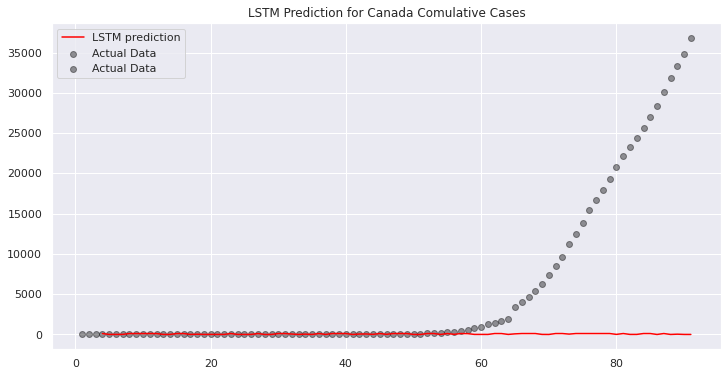

In [853]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_canada_cc, color="black",alpha= 0.4,label="Actual Data")
plt.scatter(X_train,y_train_canada_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],lstm_pred_canada_cc, color="red", label="LSTM prediction")
plt.legend()
plt.title("LSTM Prediction for Canada Comulative Cases")
plt.show()

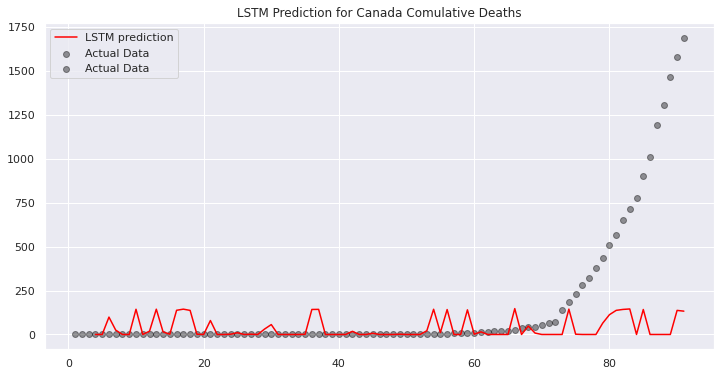

In [854]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_canada_cd, color="black",alpha= 0.4,label="Actual Data")
plt.scatter(X_train,y_train_canada_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],lstm_pred_canada_cd, color="red", label="LSTM prediction")
plt.legend()
plt.title("LSTM Prediction for Canada Comulative Deaths")
plt.show()

**China**

For Comulative Cases:

In [855]:
case_window = WindowGenerator(train_df = df_china_cc_train ,val_df = df_china_cc_train, test_df = df_china_cc_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

In [856]:
lstm_hist_china_cc = compile_and_fit(lstm_model, case_window)
IPython.display.clear_output()

lstm_pred_china_cc = lstm_model.predict(case_window.test)

3/3 [==============================] - 0s 5ms/step


For Comulative Deaths:

In [857]:
case_window = WindowGenerator(train_df = df_china_cd_train,val_df = df_china_cd_train, test_df = df_china_cd_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

lstm_hist_china_cd = compile_and_fit(lstm_model, case_window)
IPython.display.clear_output()

lstm_pred_china_cd = lstm_model.predict(case_window.test)

3/3 [==============================] - 1s 5ms/step


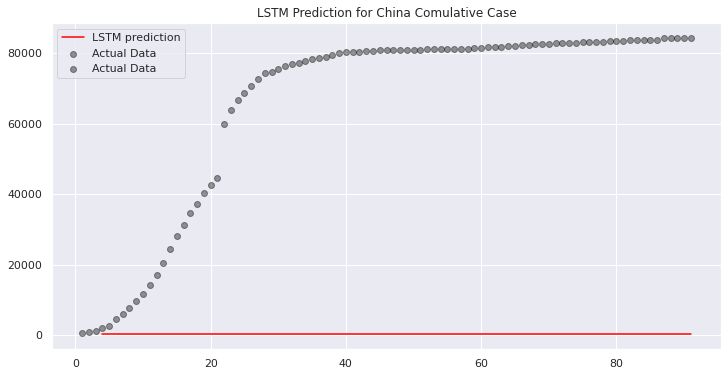

In [858]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_china_cc, color="black",alpha= 0.4,label="Actual Data")
plt.scatter(X_train,y_train_china_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],lstm_pred_china_cc, color="red", label="LSTM prediction")
plt.legend()
plt.title("LSTM Prediction for China Comulative Case")
plt.show()

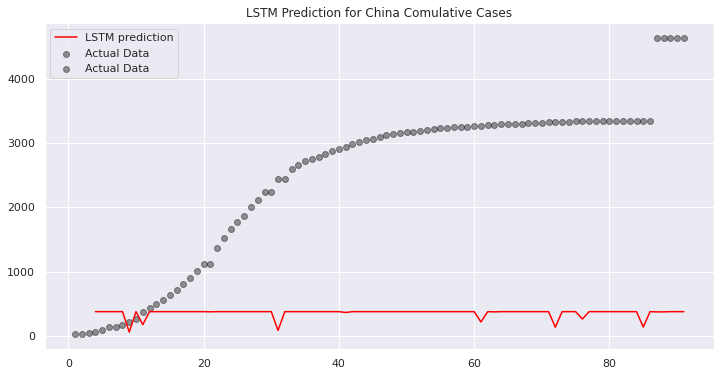

In [859]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_china_cd, color="black",alpha= 0.4,label="Actual Data")
plt.scatter(X_train,y_train_china_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],lstm_pred_china_cd, color="red", label="LSTM prediction")
plt.legend()
plt.title("LSTM Prediction for China Comulative Cases")
plt.show()

**India**

For Comulative Cases:

In [860]:
case_window = WindowGenerator(train_df = df_india_cc_train,val_df = df_india_cc_train, test_df = df_india_cc_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

lstm_hist_india_cc = compile_and_fit(lstm_model, case_window)
IPython.display.clear_output()

lstm_pred_india_cc = lstm_model.predict(case_window.test)

3/3 [==============================] - 1s 5ms/step


For Comulative Deaths:

In [861]:
case_window = WindowGenerator(train_df = df_india_cc_train,val_df = df_india_cc_train, test_df = df_india_cd_test, input_width=3, label_width=1, shift=1,label_columns = ["Case"])

lstm_hist_india_cc = compile_and_fit(lstm_model, case_window)
IPython.display.clear_output()

lstm_pred_india_cd = lstm_model.predict(case_window.test)

3/3 [==============================] - 1s 5ms/step


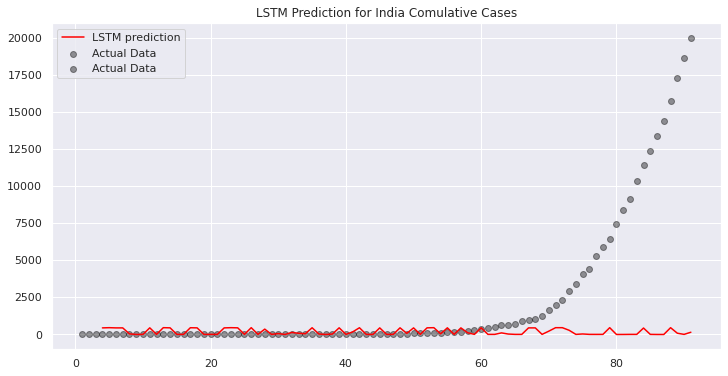

In [862]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_india_cc, color="black",alpha= 0.4,label="Actual Data")
plt.scatter(X_train,y_train_india_cc, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],lstm_pred_india_cc, color="red", label="LSTM prediction")
plt.legend()
plt.title("LSTM Prediction for India Comulative Cases")
plt.show()

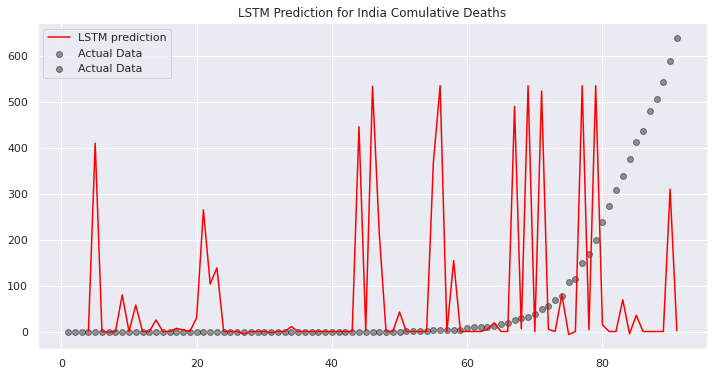

In [863]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test_india_cd, color="black",alpha= 0.4,label="Actual Data")
plt.scatter(X_train,y_train_india_cd, color="black",alpha= 0.4,label="Actual Data")
plt.plot(np.linspace(1,91,num=91).reshape(-1,1)[3:],lstm_pred_india_cd, color="red", label="LSTM prediction")
plt.legend()
plt.title("LSTM Prediction for India Comulative Deaths")
plt.show()

# 5.Results & Evaluation

**R2 Score**

In [864]:
from sklearn.metrics import r2_score

Decision Tree Regression

In [ ]:
#Canada
r2_canada_cc_dtr = r2_score(y_test_canada_cc, y_pred_canada_cc)
print("r2 for Canada cc with dtr =",r2_canada_cc_dtr)
r2_canada_cd_dtr = r2_score(y_test_canada_cd, y_pred_canada_cd)
print("r2 for Canada cd with dtr =",r2_canada_cd_dtr)

#China
r2_china_cc_dtr = r2_score(y_test_china_cc, y_pred_china_cc)
print("r2 for China cc with dtr =",r2_china_cc_dtr)
r2_china_cd_dtr = r2_score(y_test_china_cd, y_pred_china_cd)
print("r2 for China cd with dtr =",r2_china_cd_dtr)

#India
r2_india_cc_dtr = r2_score(y_test_india_cc, y_pred_india_cc)
print("r2 for India cc with dtr =",r2_india_cc_dtr)
r2_india_cd_dtr = r2_score(y_test_india_cd, y_pred_india_cd)
print("r2 for India cd with dtr =",r2_india_cd_dtr)

Linear Regression

In [ ]:
#Canada
r2_canada_cc_lr = r2_score(y_test_canada_cc, lreg_canada_cc.predict(X_test))
print("r2 for Canada cc with lr =",r2_canada_cc_lr)
r2_canada_cd_lr = r2_score(y_test_canada_cd, lreg_canada_cd.predict(X_test))
print("r2 for Canada cd with lr =",r2_canada_cd_lr)

#China
r2_china_cc_lr = r2_score(y_test_china_cc, lreg_china_cc.predict(X_test))
print("r2 for China cc with lr =",r2_china_cc_lr)
r2_china_cd_lr = r2_score(y_test_china_cd, lreg_china_cd.predict(X_test))
print("r2 for China cd with lr =",r2_china_cd_lr)

#India
r2_india_cc_lr = r2_score(y_test_india_cc, lreg_india_cc.predict(X_test))
print("r2 for India cc with lr =",r2_india_cc_lr)
r2_india_cd_lr = r2_score(y_test_india_cd, lreg_india_cd.predict(X_test))
print("r2 for India cd with lr =",r2_india_cd_lr)

Polymial Regression

In [ ]:
#Canada
r2_canada_cc_pr = r2_score(y_test_canada_cc, lreg2_china_cc.predict(poly_reg_canada_cc.fit_transform(X_test)))
print("r2 for Canada cc with pr =",r2_canada_cc_pr)
r2_canada_cd_pr = r2_score(y_test_canada_cd, lreg2_china_cc.predict(poly_reg_canada_cd.fit_transform(X_test)))
print("r2 for Canada cd with pr =",r2_canada_cd_pr)

#China
r2_china_cc_pr = r2_score(y_test_china_cc, lreg2_china_cc.predict(poly_reg_china_cc.fit_transform(X_test)))
print("r2 for China cc with pr =",r2_china_cc_pr)
r2_china_cd_pr = r2_score(y_test_china_cd, lreg2_china_cc.predict(poly_reg_china_cd.fit_transform(X_test)))
print("r2 for China cd with pr =",r2_china_cd_pr)

#India
r2_india_cc_pr = r2_score(y_test_india_cc, lreg2_china_cc.predict(poly_reg_india_cc.fit_transform(X_test)))
print("r2 for India cc with pr =",r2_india_cc_pr)
r2_india_cd_pr = r2_score(y_test_india_cd, lreg2_china_cc.predict(poly_reg_india_cd.fit_transform(X_test)))
print("r2 for India cd with pr =",r2_india_cd_pr)

CNN

In [ ]:
#Canada
r2_canada_cc_cnn = r2_score(y_test_canada_cc, cnn_pred_canada_cc)
print("r2 for Canada cc with dtr =",r2_canada_cc_cnn)
r2_canada_cd_cnn = r2_score(y_test_canada_cd, cnn_pred_india_cd)
print("r2 for Canada cd with dtr =",r2_canada_cd_cnn)

#China
r2_china_cc_cnn = r2_score(y_test_china_cc,cnn_pred_china_cc)
print("r2 for China cc with dtr =",r2_china_cc_cnn)
r2_china_cd_cnn = r2_score(y_test_china_cd, cnn_pred_china_cd)
print("r2 for China cd with dtr =",r2_china_cd_cnn)

#India
r2_india_cc_cnn = r2_score(y_test_india_cc, cnn_pred_india_cc)
print("r2 for India cc with dtr =",r2_india_cc_cnn)
r2_india_cd_cnn = r2_score(y_test_india_cd, cnn_pred_india_cd)
print("r2 for India cd with dtr =",r2_india_cd_cnn)


LSTM

In [ ]:
#Canada
r2_canada_cc_lstm = r2_score(y_test_canada_cc, lstm_pred_china_cc)
print("r2 for Canada cc with dtr =",r2_canada_cc_lstm)
r2_canada_cd_lstm = r2_score(y_test_canada_cd, lstm_pred_china_cd)
print("r2 for Canada cd with dtr =",r2_canada_cd_lstm)

#China
r2_china_cc_lstm = r2_score(y_test_china_cc, lstm_pred_india_cd)
print("r2 for China cc with dtr =",r2_china_cc_lstm)
r2_china_cd_lstm = r2_score(y_test_china_cd, lstm_pred_india_cd)
print("r2 for China cd with dtr =",r2_china_cd_lstm)

#India
r2_india_cc_lstm = r2_score(y_test_india_cc, lstm_pred_india_cd)
print("r2 for India cc with dtr =",r2_india_cc_lstm)
r2_india_cd_lstm = r2_score(y_test_india_cd, lstm_pred_india_cd)
print("r2 for India cd with dtr =",r2_india_cd_lstm)